#### Bibek Raj Dangol
#### Presidential Graduate School, Kathmandu
#### PRG 330: Python Programming
#### Prof. Tek Raj Pant 
#### November 17, 2024


# Data Transformation and Mapping 


In [16]:
# convert marks to scale of 1
import pandas as pd
students = pd.read_csv('data/student.csv')
students['mark_percent'] = students['mark'].apply(lambda m: m /100)
students.head()

,id,name,class,mark,gender,mark_percent
0,1,John Deo,Four,NaN,female,NaN
1,2,Max Ruin,Three,85.0,male,0.85
2,3,Arnold,Three,55.0,male,0.55
3,4,Krish Star,Four,60.0,female,0.60
4,5,John Mike,Four,60.0,female,0.60


# Map

In [17]:
students['grade'] = students['class'].map({'One':1, 'Two':2, 'Three':3, 'Four':4, 'Five':5, 'Six':6, 'Seven':7, 'Eight':8, 'Nine':9, 'Ten':10})
students['gender_code']= students['gender'].map({'male':1, "female": 2 })
students.head()

,id,name,class,mark,gender,mark_percent,grade,gender_code
0,1,John Deo,Four,NaN,female,NaN,4.0,NaN
1,2,Max Ruin,Three,85.0,male,0.85,3.0,1.0
2,3,Arnold,Three,55.0,male,0.55,3.0,1.0
3,4,Krish Star,Four,60.0,female,0.60,4.0,2.0
4,5,John Mike,Four,60.0,female,0.60,4.0,2.0


# Replace

In [18]:
students['class']= students['class'].replace({'Four': '4th', 'Fifth': '5th', 'Ten': '10th'})
students['name']= students['name'].replace({'John Deo': 'UttamRam'})
students.head()

,id,name,class,mark,gender,mark_percent,grade,gender_code
0,1,UttamRam,4th,NaN,female,NaN,4.0,NaN
1,2,Max Ruin,Three,85.0,male,0.85,3.0,1.0
2,3,Arnold,Three,55.0,male,0.55,3.0,1.0
3,4,Krish Star,4th,60.0,female,0.60,4.0,2.0
4,5,John Mike,4th,60.0,female,0.60,4.0,2.0


# Astype

In [19]:
students['grade']= students['grade'].astype(float)

students.head()

,id,name,class,mark,gender,mark_percent,grade,gender_code
0,1,UttamRam,4th,NaN,female,NaN,4.0,NaN
1,2,Max Ruin,Three,85.0,male,0.85,3.0,1.0
2,3,Arnold,Three,55.0,male,0.55,3.0,1.0
3,4,Krish Star,4th,60.0,female,0.60,4.0,2.0
4,5,John Mike,4th,60.0,female,0.60,4.0,2.0


# Pipe


In [20]:
def check_result(df):
    df['result']= df['mark'].apply(lambda m: 'pass' if m>40 else 'fail')
    return df
students = students.pipe(check_result)
students.head()

,id,name,class,mark,gender,mark_percent,grade,gender_code,result
0,1,UttamRam,4th,NaN,female,NaN,4.0,NaN,fail
1,2,Max Ruin,Three,85.0,male,0.85,3.0,1.0,pass
2,3,Arnold,Three,55.0,male,0.55,3.0,1.0,pass
3,4,Krish Star,4th,60.0,female,0.60,4.0,2.0,pass
4,5,John Mike,4th,60.0,female,0.60,4.0,2.0,pass


# Data Cleaning and Manipulation

- Handle Missing Data
- Handle Duplicates
- One-Hot-Encoding
- Normalization

## Handle Missing Data
- Remove Rows Containing Missing Values ``(df.dropna())``
    - dropna(axis=0) removes rows containing at least one missing value 
    - (dropna(axis=1)) removes rows containing at least one missing value
 - Replace Missing Values ``(df.fillna())``
    - Replace with secific values: ``(df.fillna(value))``
    - Backward fill, Forward Fill: ``(df.fillna(value, method= 'bfill')) (df.fillna(value, method= 'ffill)``

In [21]:
from IPython.display import display

students = pd.read_csv('data/student.csv')
display(students.head())
students.dropna(axis=0, how= 'any', inplace= True)

students = students.fillna(1)
display(students.head())

students.fillna(method='ffill')
students.fillna(method='bfill')
students['mark'].fillna(50)
students.fillna({'mark': 50, 'gender': 'male'})
df_interplated = students.interpolate()
students.fillna(df_interplated)
students['mark'].fillna(students['marks'].mean())

,id,name,class,mark,gender
0,1,John Deo,Four,NaN,female
1,2,Max Ruin,Three,85.0,male
2,3,Arnold,Three,55.0,male
3,4,Krish Star,Four,60.0,female
4,5,John Mike,Four,60.0,female


,id,name,class,mark,gender
1,2,Max Ruin,Three,85.0,male
2,3,Arnold,Three,55.0,male
3,4,Krish Star,Four,60.0,female
4,5,John Mike,Four,60.0,female
5,6,Alex John,Four,55.0,male


C:\Users\acer\AppData\Local\Temp\ipykernel_15584\816543643.py:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  students.fillna(method='ffill')
C:\Users\acer\AppData\Local\Temp\ipykernel_15584\816543643.py:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  students.fillna(method='bfill')
C:\Users\acer\AppData\Local\Temp\ipykernel_15584\816543643.py:14: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_interplated = students.interpolate()


KeyError: 'marks'

## Handle Duplicate Data 
- Check Duplicate 
- Drop duplicate

In [ ]:
duplicates = students.duplicates() # check duplicate
students.drop_duplicates()    # drop duplicate

duplicates

## One-Hot-Encoding 

In [ ]:
import pandas as pd

students = pd.read_csv('data/student.csv')
df_pandas_encoded = pd.get_dummies(students, columns = ['class'])
display(df_pandas_encoded)

,id,name,mark,gender,class_Eight,class_Fifth,class_Five,class_Four,class_Nine,class_Seven,class_Six,class_Three
0,1,John Deo,NaN,female,False,False,False,True,False,False,False,False
1,2,Max Ruin,85.0,male,False,False,False,False,False,False,False,True
2,3,Arnold,55.0,male,False,False,False,False,False,False,False,True
3,4,Krish Star,60.0,female,False,False,False,True,False,False,False,False
4,5,John Mike,60.0,female,False,False,False,True,False,False,False,False
5,6,Alex John,55.0,male,False,False,False,True,False,False,False,False
6,7,My John Rob,78.0,male,False,True,False,False,False,False,False,False
7,8,Asruid,85.0,male,False,False,True,False,False,False,False,False
8,9,Tes Qry,78.0,male,False,False,False,False,False,False,True,False
9,10,Big John,55.0,female,False,False,False,True,False,False,False,False


## Data Normalization

Data normalization involves adjusting measurements values of different scales to a common scale. Normalization is only aplicable to numerical columns. There are five common normalization methods:
- Single feature scaling
- Min-max scaling
- Log scaling
- Z-score Normalization
- Clipping

In [23]:
import numpy as np
products = pd.read_csv('data/product-data.csv')
#single feature scaling
products['Sales_Single_Scale']= products['Sales']/ products['Sales'].max()
# log
products['Sales_Log_Scale']= np.log1p(products['Sales'])
#Clipping 
products['Discount_Clipped']= products['Discount_Percentage'].clip(lower =5, upper =15)

products

,Product_ID,Sales,Price,Customer_Rating,Discount_Percentage,Sales_Single_Scale,Sales_Log_Scale,Discount_Clipped
0,1,500,200,4.2,10,0.50,6.216606,10
1,2,700,450,3.9,15,0.70,6.552508,15
2,3,800,300,4.5,12,0.80,6.685861,12
3,4,900,350,4.8,8,0.90,6.803505,8
4,5,1000,500,4.0,5,1.00,6.908755,5
5,6,300,250,3.7,20,0.30,5.707110,15
6,7,450,275,4.3,17,0.45,6.111467,15
7,8,620,320,3.8,7,0.62,6.431331,7
8,9,750,400,4.1,6,0.75,6.621406,6
9,10,850,375,4.6,14,0.85,6.746412,14


## Grouping and Aggregate
- Grouping consistsof three operations
    - split
    - apply
    - combine

In [27]:
import numpy as np
from IPython.display import display
import pandas as pd

students = pd.read_csv('data/student.csv')
gender_data  = students.groupby('gender')
display(gender_data.count())
gender_data['mark'].mean()

group_by_class = students.groupby('class')
display(group_by_class['mark'].mean())


,id,name,class,mark
gender,,,,
female,1,1,1,0
female,16,16,16,16
male,18,18,18,18


class
Eight    79.000000
Fifth    78.000000
Five     80.000000
Four     70.375000
Nine     41.500000
Seven    77.600000
Six      82.571429
Three    73.666667
Name: mark, dtype: float64

## Aggregation
- count()= Number of non-null observations  
- sum() = sum of all values
- mean()= Mean of values
- median()= Arithmetic median of values
- min()= Minimum
- max()= Maximum
- mode()= Mode
- std() = Standard deviation of values
- var()= Variance of values

## Sorting
- Sort by index
- Sort by values
    - Ascending
    - Descending
    - sorting by date
    - sorting by key function

In [37]:
students = pd.read_csv('data/student.csv')
display(students.head())
new_sorted_data = students.sort_values(by= ['name', 'mark'],ascending = True)
display(new_sorted_data.head())

,id,name,class,mark,gender
0,1,John Deo,Four,NaN,female
1,2,Max Ruin,Three,85.0,male
2,3,Arnold,Three,55.0,male
3,4,Krish Star,Four,60.0,female
4,5,John Mike,Four,60.0,female


,id,name,class,mark,gender
5,6,Alex John,Four,55.0,male
2,3,Arnold,Three,55.0,male
7,8,Asruid,Five,85.0,male
20,21,Babby John,Four,69.0,female
9,10,Big John,Four,55.0,female


In [38]:
data= pd.read_csv('data/student-admission.csv')
data['AdmissionDate'] = pd.to_datetime(data['AdmissionDate'])
sorted_by_date = data.sort_values(by= ['AdmissionDate', 'Name'], ascending = False)
sorted_by_date

,Unnamed: 0,AdmissionDate,StudentID,Name,Stream
0,0,2021-01-25,7,Ram,CSE
1,1,2021-01-22,5,Shyam,ECE
4,4,2021-01-22,6,Lucky,CSE
6,6,2021-01-21,4,Danny,EEE
2,2,2021-01-20,3,Mohan,Civil
3,3,2021-01-18,2,Sohan,Mechanical
5,5,2021-01-17,1,Abhinav,IT


## Python Data Visualization with Matplotlib and Seaborn
### Types of Graphs and Visualization Tools

# Data Comparsion and Visualization
- Bar Chart
- Line Graph
- Multiple Line Graph

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Compare GPD of Nepal, India, China.


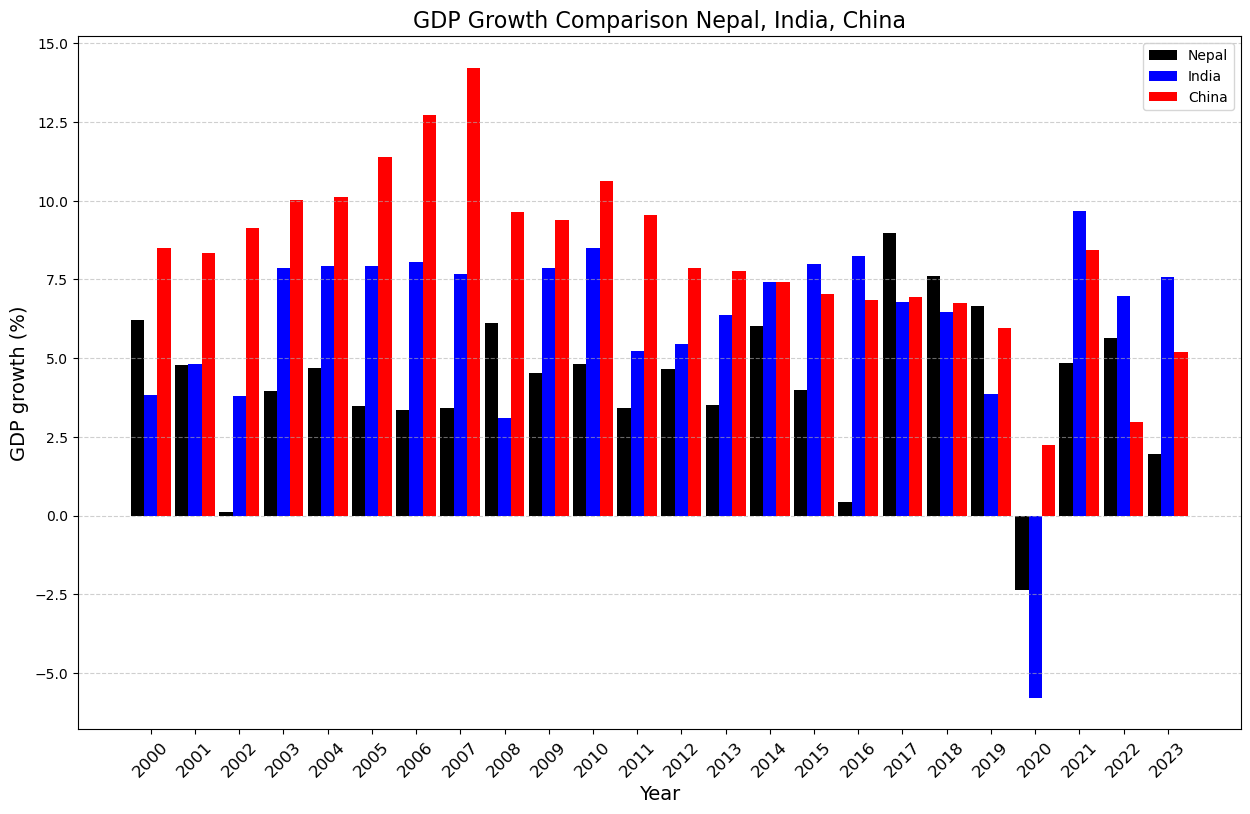

In [49]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
nep_ind_china_gdp_data = pd.read_csv('data/nep-india-china-gdp.csv')

plt.figure(figsize=(15,9))
width = 0.3
x = range(len(nep_ind_china_gdp_data['Year']))

plt.bar([i - width for i in x], nep_ind_china_gdp_data['Nepal'], label = 'Nepal', width=width, color='black')
plt.bar(x, nep_ind_china_gdp_data['India'], width=width, label= 'India', color='blue')
plt.bar([i + width for i in x], nep_ind_china_gdp_data['China'], width=width, label= 'China', color='red')

plt.title('GDP Growth Comparison Nepal, India, China', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('GDP growth (%)', fontsize= 14)
plt.xticks(x, nep_ind_china_gdp_data['Year'], fontsize=12, rotation = 45)
plt.legend()

plt.grid(axis='y', linestyle='--', alpha = 0.6)
plt.show() 